In [1]:
import numpy as np

import matplotlib.pyplot as plt
from math import sqrt

import time
import torch

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

    
print(device)

cuda:0


In [3]:
class span:
    def __init__(self, pts, max_charge = 3):
        self.max_charge = max_charge
        self.curr_charge = self.max_charge
        self.min_charge = 0.75
        self.pts = pts
        self.home = pts[0]
        self.center_dis = {}
        self.indices_for_order = {}
        self.path = []
        self.curr_path = []
        self.visited_map = {}
        self.order = []
        self.center_dis = {}
        self.sorted_distance = {}
        self.no_home = self.pts[1:]
        self.grid = []
        
    def distance(self, pt1, pt2):
        return np.sqrt((pt1[0]-pt2[0])**2 + (pt1[1]-pt2[1])**2, dtype= np.float16)
    
    def cal_visited_map(self):
        for i in range(0,len(self.pts)):
            key = str(self.pts[i])
            self.visited_map[key] = 0
        return self.visited_map
    
    def cal_center_distance_map(self):
        for i in range(1,len(self.pts)):
            key = str(self.pts[i])
            self.center_dis[key] = self.distance(self.home, self.pts[i])

    def cal_indices(self):
        for i in range(0,len(self.no_home)):
            key = str(self.no_home[i])
            self.indices_for_order[key] = i

    def sort_dict(self):
        self.cal_center_distance_map()
        sorted_keys = sorted(self.center_dis, key=self.center_dis.get)  # [1, 3, 2]
        for w in sorted_keys:
            self.sorted_distance[w] = self.center_dis[w]
    
    def get_sort_list(self):
        self.sort_dict()
        key_list = np.array(list(self.sorted_distance))
        data = []
        for i in range(0,len(key_list)):
            a = key_list[i].split()
            a_new = []
            for j in range(0, len(a)):
                element = a[j]
                new_elem = []
                for el in element:
                    if el == '[' or el == ']':
                        pass
                    else:
                        new_elem.append(el)
                new_elem = ''.join(new_elem)
                if len(new_elem) > 0:
                    f_new = float(new_elem)
                    a_new.append(f_new)
            cur = np.asarray(a_new)
            data.append(cur)
        data_set = np.array(data)
        return data_set
    
    def make_grid(self):
        sub_grid = []
        for i in range(0, len(self.no_home)):
            for j in range(0, len(self.no_home)):
                if j == i:
                    sub_grid.append(100)
                else:
                    sub_grid.append(self.distance(self.no_home[i], self.no_home[j]))
            self.grid.append(sub_grid)
            sub_grid = []
    
    def generate_path(self):
        self.cal_indices()
        prev_pt = self.home
        self.cal_visited_map()
        self.make_grid()
        update_row = np.ones(len(self.no_home), dtype= np.float16)*100
        self.grid = np.array(self.grid, dtype= np.float16)

        final_order = []
        final_order.append(0)
        key_list = self.get_sort_list()
        keys = key_list
        curr_point = key_list[0]
        
        while not all(self.visited_map.values()):
            new_keys = []
            for i in range(0, len(keys)):
                if keys[i][0] == curr_point[0] and keys[i][1] == curr_point[1]:
                    pass
                else:
                    new_keys.append(keys[i])
            
            if len(new_keys) < 1:
                break
                
            if prev_pt[0] == self.home[0] and prev_pt[1] == self.home[1]:
                curr_dis = self.center_dis[str(curr_point)]
                self.curr_charge -= curr_dis
                self.visited_map[str(curr_point)] = 1
                self.curr_path.append(list(curr_point))
                final_order.append(self.indices_for_order[str(curr_point)])
                prev_pt = curr_point

            elif self.curr_charge - min_dis > self.min_charge: 
                curr_dis = min_dis
                self.curr_charge -= curr_dis
                self.visited_map[str(curr_point)] = 1
                self.curr_path.append(list(curr_point))
                final_order.append(self.indices_for_order[str(curr_point)])
                prev_pt = curr_point

            else:
                self.curr_charge = 3
                self.visited_map[str(home)] += 1
                self.curr_path.insert(0, list(self.home))
                self.curr_path.append(list(self.home))
                final_order.append(0)
                self.path.append(self.curr_path)
                self.curr_path = []
                prev_pt = self.home
                

            current_pt_index = self.indices_for_order[str(curr_point)]
            min_dis = np.min(self.grid[current_pt_index])
            min_dis_index = np.where(self.grid[current_pt_index] == min_dis)
            curr_point = self.no_home[min_dis_index][0]

            if not self.visited_map[str(curr_point)]:
                self.grid[current_pt_index] = update_row[:]
                self.grid[:, min_dis_index[0][0]] = update_row[:]
            else:
                self.grid[current_pt_index] = update_row[:]
                self.grid[:, min_dis_index[0][0]] = update_row[:]
                keys = new_keys
                curr_point = keys[0]
                final_order.pop(-1)
        output = []
        for i in final_order:
            output.append(i)
        return self.path, output

In [4]:
home = np.array([0.5, 0.5])
pts_in = np.random.rand(1000,2)
pts_input = np.around(pts_in, 4)



max_charge = 3.0
pts = np.vstack((home, pts_input))
print(pts)


[[0.5    0.5   ]
 [0.8444 0.0347]
 [0.3301 0.5339]
 ...
 [0.3509 0.9434]
 [0.1983 0.3814]
 [0.5761 0.7803]]


In [9]:
Span_1 = span(pts)

path_B, order = Span_1.generate_path()

<Figure size 432x288 with 0 Axes>

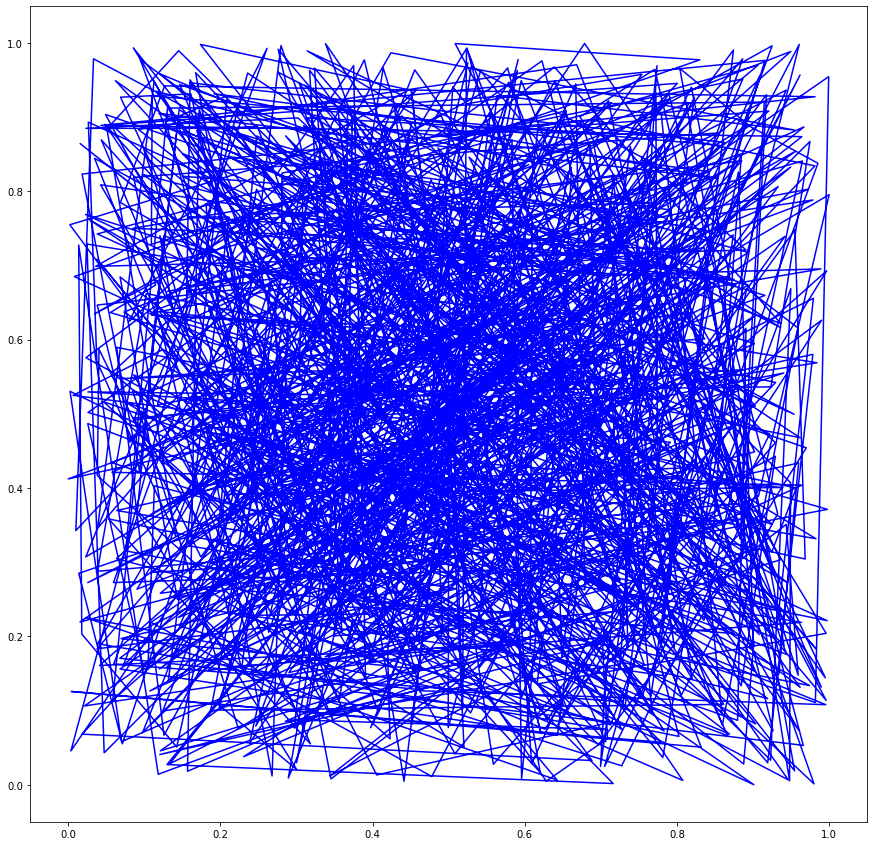

In [10]:
fig = plt.figure(2)
plt.figure(figsize=(15, 15))

x_value = []
y_value = []
for p in order:

    x1, y1 = pts[p][0], pts[p][1]
    x_value.append(y1)
    y_value.append(x1)
plt.plot(x_value, y_value, c = 'blue')
plt.savefig("plan_c1_1000.png")
plt.show()